# Happy & Sad ImageClassifier
###

#### Importing Required libraries

In [6]:
import tensorflow as tf
import os

##### To Avoid OOM (out of memory) error by setting GPU Memory Consumption Growth

In [8]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [9]:
gpus

[]

##### remove dodgy images

In [12]:
import cv2
import imghdr

In [17]:
data_dir='F:\d'

In [18]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '163-1635094_happiness-love-clip-art-happy-people-transparent-background.png',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '2560px-Happy_People.jpg',
 '3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL.jpg',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'blog_image_20180219221810890.jpg',
 'compassion-900x387.jpg',
 'crowd-of-happy-people-poster-vector-20970718.jpg',
 'Dollarphotoclub

In [19]:
image_exts=['jpeg','jpg','bmp','png']

In [20]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [21]:
from matplotlib import pyplot as plt

In [22]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)
            
                

Issue with image F:\d\happy\3BCckliche-menschen-konzept-gruppe-von-jugendlichen-auf-der-suche-nach-unten.jpg
Issue with image F:\d\happy\Happy20People.jpg
Issue with image F:\d\happy\o-HAPPY-facebook.jpg
Issue with image F:\d\sad\44861512-smiling-man-in-a-crowd-of-sad-people.jpg
Issue with image F:\d\sad\50740738-portrC3A4ts-der-traurige-menschen.jpg
Issue with image F:\d\sad\cry-360x240.gif
Issue with image F:\d\sad\sad-people-chairs-group-therapy-session_23-2148752072.jpg
Issue with image F:\d\sad\sad-people-group-therapy-session_23-2148752071.jpg


## Loading The  DataSet

In [24]:
import numpy as np

In [26]:
data=tf.keras.utils.image_dataset_from_directory('F:\d')

Found 160 files belonging to 2 classes.


In [27]:
data_iterator=data.as_numpy_iterator()

In [28]:
data_iterator

In [29]:
batch= data_iterator.next()

In [30]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [31]:
batch[1]
 #0 is happy and 1 is sad

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

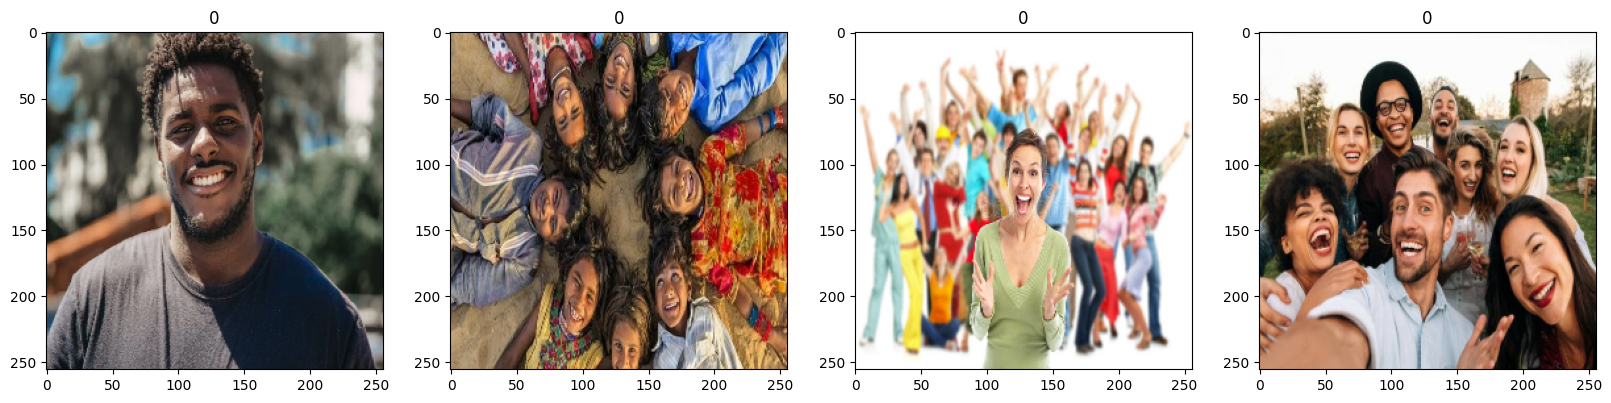

In [32]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess The Data

In [34]:
data=data.map(lambda x,y:(x/255,y))

In [35]:
data.as_numpy_iterator().next()

(array([[[[7.9255515e-01, 7.9255515e-01, 8.0039829e-01],
          [8.0039829e-01, 8.0039829e-01, 8.0824143e-01],
          [7.9686004e-01, 7.9686004e-01, 8.0470318e-01],
          ...,
          [8.0143994e-01, 7.9359680e-01, 8.0536151e-01],
          [8.0484068e-01, 7.9699755e-01, 8.0876225e-01],
          [8.0079955e-01, 7.9295641e-01, 8.0472112e-01]],
 
         [[7.7647060e-01, 7.7647060e-01, 7.8431374e-01],
          [7.8431374e-01, 7.8431374e-01, 7.9215688e-01],
          [7.7951789e-01, 7.7951789e-01, 7.8736103e-01],
          ...,
          [7.8535539e-01, 7.7751225e-01, 7.8927696e-01],
          [7.8768009e-01, 7.7983695e-01, 7.9160166e-01],
          [7.8370100e-01, 7.7585787e-01, 7.8762257e-01]],
 
         [[7.8719366e-01, 7.8719366e-01, 7.9503679e-01],
          [7.9503679e-01, 7.9503679e-01, 8.0287993e-01],
          [7.9172796e-01, 7.9172796e-01, 7.9957110e-01],
          ...,
          [7.9814643e-01, 7.9030329e-01, 8.0206800e-01],
          [7.9814643e-01, 7.9030329e-

In [36]:
scaled_iterator=data.as_numpy_iterator()

In [37]:
scaled_iterator.next()[0].max()

1.0

### Split The Data For Training and Testing

In [39]:
len(data)

5

In [40]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [41]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model(CNN)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [45]:
model=Sequential()

In [46]:
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train The Model

In [50]:
logdir='logs'

In [51]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [52]:
hist=model.fit(train,epochs=25,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/25


3/3 [==============================] - 62s 9s/step - loss: 0.6499 - accuracy: 0.5938 - val_loss: 1.1449 - val_accuracy: 0.5938
Epoch 2/25
3/3 [==============================] - 9s 3s/step - loss: 0.8466 - accuracy: 0.6250 - val_loss: 0.5974 - val_accuracy: 0.6875
Epoch 3/25
3/3 [==============================] - 9s 3s/step - loss: 0.5399 - accuracy: 0.7083 - val_loss: 0.6351 - val_accuracy: 0.5312
Epoch 4/25
3/3 [==============================] - 9s 3s/step - loss: 0.5494 - accuracy: 0.6667 - val_loss: 0.4353 - val_accuracy: 0.8750
Epoch 5/25
3/3 [==============================] - 9s 3s/step - loss: 0.4718 - accuracy: 0.7812 - val_loss: 0.4970 - val_accuracy: 0.7500
Epoch 6/25
3/3 [==============================] - 9s 3s/step - loss: 0.3705 - accuracy: 0.8646 - val_loss: 0.3751 - val_accuracy: 0.8750
Epoch 7/25
3/3 [==============================] - 9s 3s/step - loss: 0.3257 - accuracy: 0.8646 - val_loss: 0.3740 - val_accuracy: 0.8125
Epoch 8/25
3/3 [======================

In [58]:
plt.Performance 

In [59]:
hist.history

{'loss': [0.6499437689781189,
  0.8465579152107239,
  0.5398576259613037,
  0.5493928790092468,
  0.4718095064163208,
  0.37053564190864563,
  0.3256921172142029,
  0.3378114700317383,
  0.23613972961902618,
  0.2633571922779083,
  0.23788051307201385,
  0.16842292249202728,
  0.13314329087734222,
  0.08227165043354034,
  0.09725495427846909,
  0.10646158456802368,
  0.12036039680242538,
  0.12123588472604752,
  0.04402659460902214,
  0.04980650171637535,
  0.03331318125128746,
  0.028803626075387,
  0.01367842685431242,
  0.009275798685848713,
  0.009753919206559658],
 'accuracy': [0.59375,
  0.625,
  0.7083333134651184,
  0.6666666865348816,
  0.78125,
  0.8645833134651184,
  0.8645833134651184,
  0.8229166865348816,
  0.9270833134651184,
  0.8854166865348816,
  0.9375,
  0.9791666865348816,
  0.96875,
  0.9895833134651184,
  0.9791666865348816,
  0.9583333134651184,
  0.9479166865348816,
  0.9791666865348816,
  0.9895833134651184,
  1.0,
  0.9895833134651184,
  1.0,
  1.0,
  1.0,
  

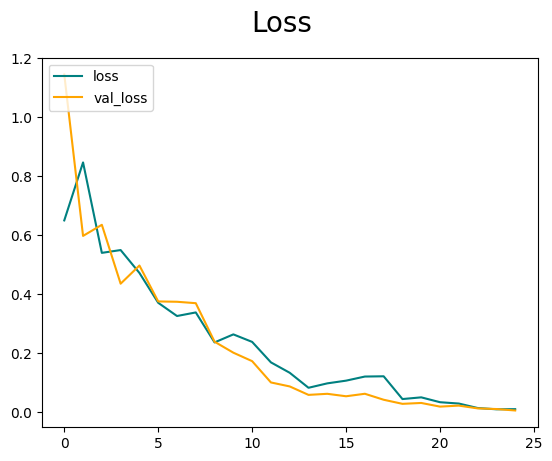

In [60]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

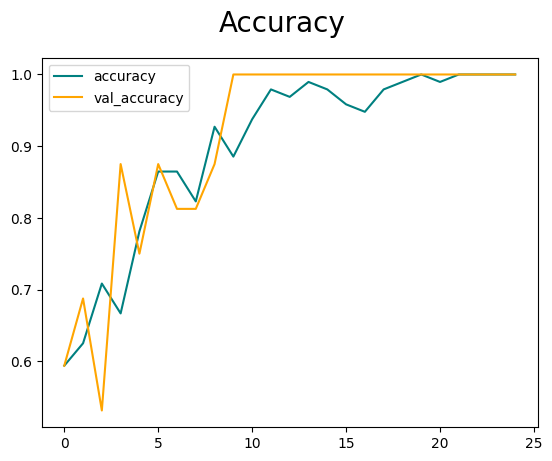

In [61]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluation Of The Model

In [63]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [64]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [65]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [66]:
pre.result().numpy()

0.0

In [67]:
re.result().numpy()

0.0

In [68]:
acc.result().numpy()

0.0

## Test The Model

In [70]:
import cv2

### Uploading Images for Prediction

### TypeError: Image data of dtype object cannot be converted to float
- solution ---> img=cv2.imread(r'image_path')

#### (1) Image 1

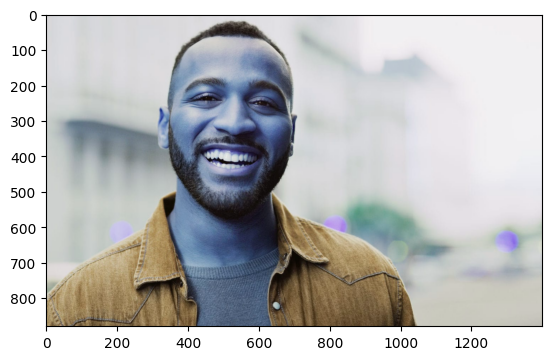

In [77]:
img=cv2.imread(r'F:\d\happy\05-12-21-happy-people.jpg')
plt.imshow(img)
plt.show()

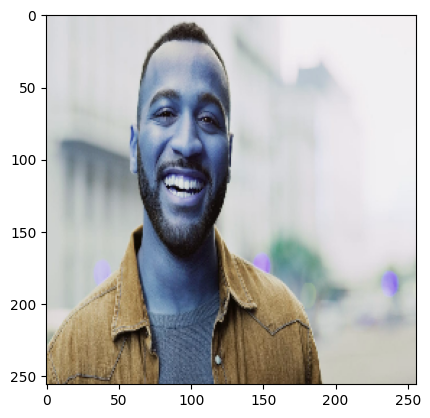

In [78]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [79]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 6s 6s/step


In [80]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


### (2) Image 2

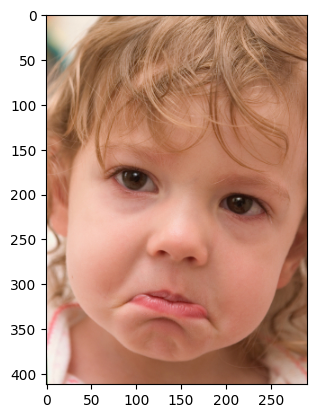

In [81]:
img=cv2.imread(r'F:\d\sad\iStock_000001932580XSmall.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

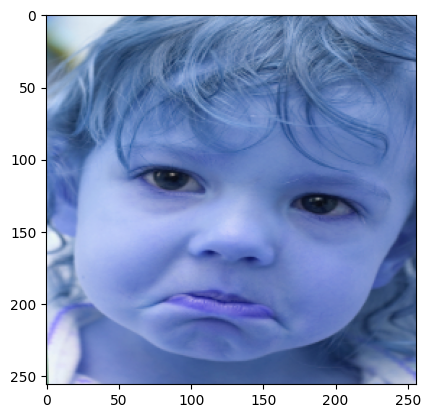

In [82]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [83]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 78ms/step


In [84]:
yhat

array([[0.80508584]], dtype=float32)

In [85]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


#### (3) Image 3

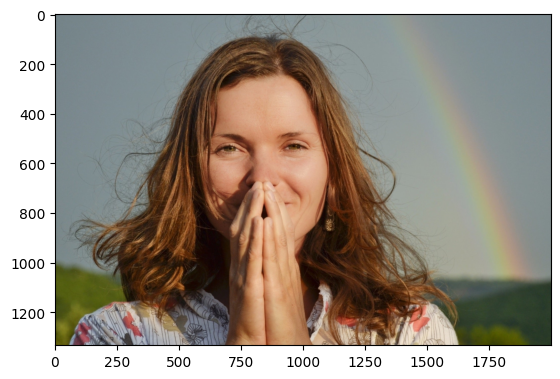

In [86]:
img=cv2.imread(r'F:\d\happy\20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

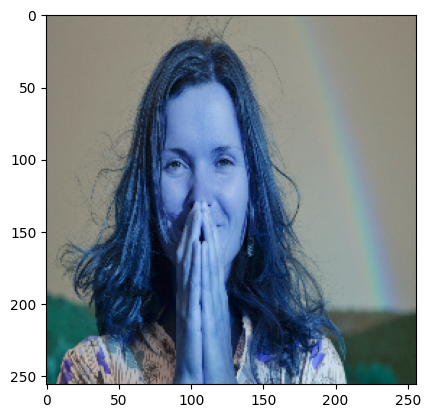

In [87]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 431ms/step


In [89]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### (4) Image 4

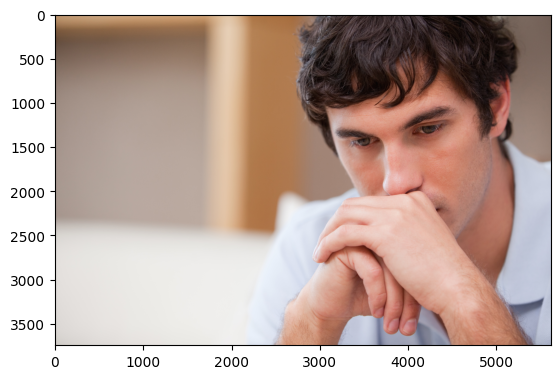

In [91]:
img=cv2.imread(r'F:\d\sad\8iAb9k4aT.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

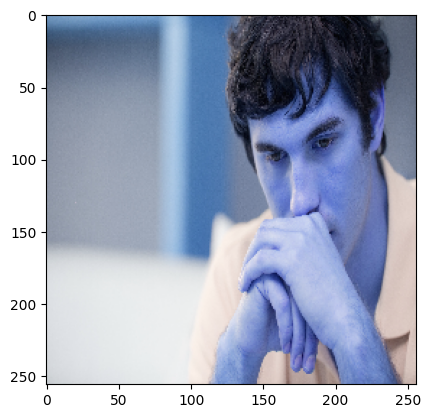

In [92]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [93]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 181ms/step


In [94]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


#### (5) Image 5

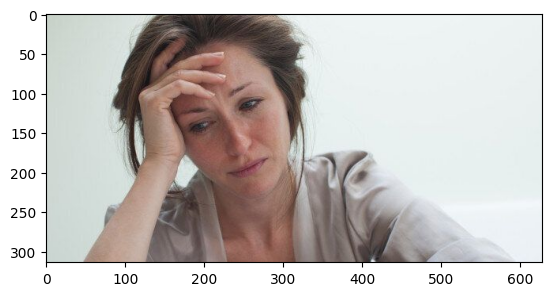

In [96]:
img=cv2.imread(r'F:\d\sad\5cd731f92100002f007a7304.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

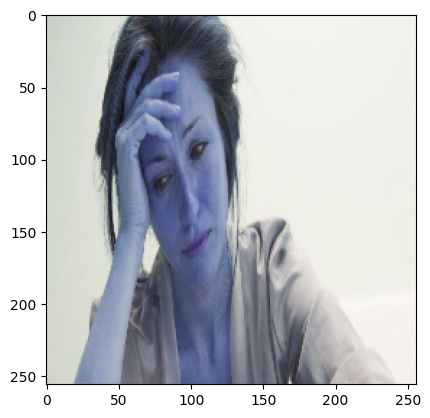

In [97]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [221]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 47ms/step


In [222]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


### (6) image 6

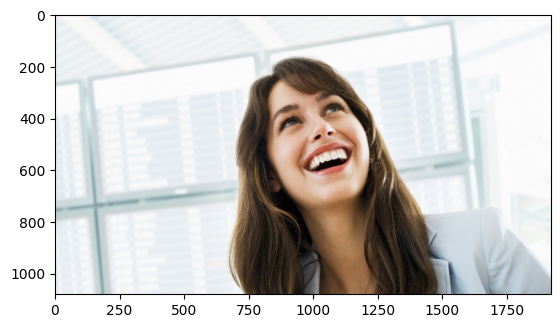

In [98]:
img=cv2.imread(r'F:\d\happy\getty_107808334_121413.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

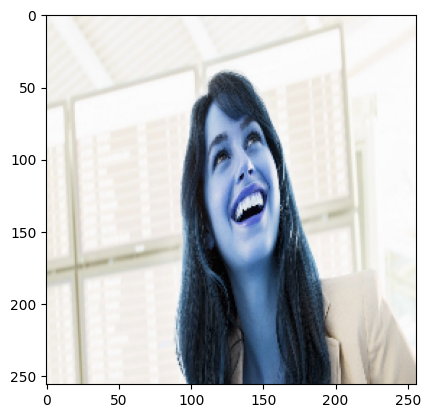

In [99]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [228]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 158ms/step


In [229]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## *************************************************************************************

### Name - Aatish Kumar Baitha
 - M.Tech(Data Science 2nd Year Student)

#### My Linkedin Profile -
- https://www.linkedin.com/in/aatish-kumar-baitha-ba9523191

#### My Blog -
- https://computersciencedatascience.blogspot.com/

# Thank you!